# Ch2.Randomized Experiment & Stats Review
2장에서는 먼저 1장에서 살펴본 몇가지 개념을 무작위 실험(Randomized experiment)의 관점에서 살펴본다. 무작위 실험은 인과추론의 가장 중요한 표준이다. 무작위 실험을 할 수 없는 상황이라도, 무작위 실험을 이상적인 기준으로 두면 인과관계를 생각할 때 큰 도움이 될 것이다. 그 다음에는 몇 가지 기초 통계 개념을 복습한다.

---

## 2.1 무작위 배정을 통한 독립성 확보

1장에서 상관관계와 인과관계가 다른 이유를 알아봤다. 그리고 둘이 동일하려면 어떤 조건을 만족해야 하는지도 살펴봤다.
$$
E[Y|T=1]-E[Y|T=0] = 
\underbrace{E[Y_1-Y_0|T=1]}_{\text{ATT}} + 
\underbrace{\{E[Y_0|T=1]-E[Y_0|T=0]\}}_{\text{Bias}}
$$ 
요약하자면 상관관계는 두 가지 요소인 $ATT$와 편향의 합으로 설명할 수 있다. 따라서 편향이 0이면, 측정한 상관관계는 완전히 인과관계가 된다. 편향이 없다는 말은 $E[Y_t|T=0]=E[Y_t|T=1]$인 경우를 의미한다. 즉, 실험군과 대조군에서 처치 이외의 나머지 조건이 동일(비교 가능)하다면 상관관계는 인과관계가 된다. 조금 더 전문적으로 말하자면, 적어도 실험군과 대조군의 잠재적 결과에 대한 기댓값이 같음을 말한다. 또한 1장에서 잠재적 결과가 처치와 독립인 경우에 어떻게 상관관계가 인과관계와 동일해지는지 간단히 배웠다.

$$
(Y_0,Y_1)\bot T
$$

**처치와 결과 사이의 독립성을 이야기하는 것이 아니라는 점**이 중요하다. 처치와 결과가 독립적이라면 처치는 관측하려는 결과에 아무런 영향을 미치지 않게 된다. 예를 들어, 회사 앱의 새로운 기능(Feature)을 처치로, 해당 앱에서의 사용 시간(TimeSpent)을 결과로 정의해본다.
$$
Feature \bot TimeSpent
$$
라면, 실험군과 대조군 모두 앱에서의 사용 시간이 동일하다는 뜻이다. 즉, 새로운 기능은 결과에 아무런 영향을 미치지 못한다. 대신, 우리는 **잠재적 결과가 처치와 독립적**이기를 바란다. 앞서 말한 결과와 처치가 독립인 경우와 완전히 다르다. $Y_1 \bot T$는 실험 대상이 처치 받았더라면 관측되었을 결과가 실제로 처치 받았는지 여부와 무관하다는 뜻이다. 비슷하게 $Y_0 \bot T$는 실험대상이 처치 받지 않았을 경우 관측되었을 결과가 실제 처치 여부와 무관하다. 요약하면 실제로 관측된 결과 $Y$는 처치 여부에 따라 달라진다.

더 쉽게 말하자면 독립성 가정은 실험군과 대조군이 비교 가능함을 뜻한다. 처치 배정(Treatment assignment)에 대해 안다고 해도, 기준이 되는 잠재적 결과 $Y_0$에 관한 정보를 얻을 수 없다. 따라서 $(Y_0,Y_1) \bot T$는 실험군과 대조군의 결과 차이를 유발한 요인이 바로 처치라는 걸 의미한다.

$$
E[Y_0|T=0]=E[Y_0|T=1]=E[Y_0]
$$
$$
E[Y_1|T=0]=E[Y_1|T=1]=E[Y_1]
$$

앞의 두 수식에서 보았듯이, 독립성 가정을 만족하면 실험군과 대조군의 평균을 비교하여 간단히 $ATE$를 식별할 수 있다.
$$
E[Y|T=1]-E[Y|T=0]=E[Y_1-Y_0]=ATE
$$

독립성은 가정에 불과하지만, 처치 $T$를 무작위로 배정하면 실험군과 대조군이 비교 가능해지는 더 그럴듯한 상황을 만들어볼 수 있다. 이렇게 하면, 처치 배정 개념은 완전히 무작위 배정 과정을 아는 동전 던지기와 연결할 수 있다. 동전이 꼭 공정할 필요는 없으며, 피험자의 10%나 1%이하에게만 처치를 배정할 수도 있다. 처치 배정 매커니즘이 무작위라면 처치효과를 식별하는 데 적합한 조건을 만족할 수 있다.  
무작위로 처치를 배정하면 실험군과 대조군의 기댓값은 거의 비교가 가능해진다. 두 그룹 간의 유일한 차이는 처치밖에 없으므로, 두 그룹의 결과 차이는 해당 처치에 따른 것으로 볼 수 있다. 기본적으로 랜덤화는 처치와 **잠재적 결과**를 독립적으로 만든다.

다음 절에서는 교차 판매 이메일의 영향을 파악하는 데 무작위 통제 실험(Randomized Control Trial,RCT)을 활용한 예제를 보인다.

---

## 2.2 A/B 테스트 사례

기업에서는 신규 고객을 확보할 목적으로 제품을 할인가(혹은 무료)로 제공하는 전략을 사용하기도 한다. 즉각적인 수익은 낮지만, 먼저 신규 고객을 확보한 후 수익성이 더 높은 제품을 고객에게 교차 판매할 수 있다. 커피 배달 회사를 예시로 생각해보자. 이 회사의 주요 상품은 고품질의 엄선된 커피를 매주 배송해주는 저렴한 월간 구독 서비스이다. 이 저렴한 기본 상품 이외에도 세계 최고급의 드립용 원두가 포함된 프리미엄 구독 서비스가 있다. 이 상품의 수익성이 높아서, 저가형 상품을 구독하는 사용자들에게 해당 프리미엄 서비스를 판매하고 싶다. 마케팅 팀은 교차 판매 이메일을 활용해 저가형 상품 구독자들에게 프리미엄 상품을 홍보한다. 그리고 인과추론 전문가로서 이러한 이메일이 얼마나 효과적인지 알아내야 한다.

이 질문에 답하기 위해 랜덤화되지 않은 기존 데이터를 살펴본다. 이메일을 받은 고객이 프리미엄 구독을 구매할 가능성이 더 높다. 전문 용어로, 추천하는 제품을 고객이 구매했을 때 이를 전환(convert)되었다고 한다. 즉, 이메일을 받은 고객이 더 많이 전환됐다고 할 수 있다.
$$
E[Conversion|Email=1] \gt E[Conversion|Email=0]
$$

하지만, 마케팅 팀은 애초에 전환 가능성이 높다고 생각한 고객에게만 이메일을 보낸다는 사실을 알았다. 어떻게 그런 고객을 찾았는지는 명확하지 않지만, 회사와 가장 많이 소통한 고객을 골랐거나 만족도 조사에서 긍정적인 답변을 한 고객을 찾았을 수도 있다. 이 부분을 다음과 같이 수식으로 표현할 수 있다.
$$
E[Conversion_0|Email=1] \gt E[Conversion_o|Email=0]
$$

쉽게 말하자면, 실제로 이메일을 받은 고객은 설령 이메일을 받지 않았더라도 다른 고객보다 더 많이 전환될 수 있다. 따라서 편향 때문에 단순한 비교로는 교차 판매 이메일의 실제 인과효과를 추정할 수 없다. 이 문제를 해결하려면 이메일을 받은 고객과 받지 않은 고객을 비교 가능하도록 만들어야 한다. 이를 식으로 표현하면 $E[Y_0|T=1]=E[Y_0|T=0]$이다. 이메일을 **무작위**로 고객에게 보내면 비교 가능한 상황을 만들 수 있다. 이렇게 하면 이메일을 받은 고객과 받지 않은 고객의 전환률은 평균적으로 동일해진다. 실제로 무작위 배정했다고 가정하고 전체 고객에서 무작위로 3명의 고객을 샘플링한다. 그 중 한 명에게는 이메일을 보내지 않았고, 다른 한명에게는 프리미엄 구독을 자세히 설명하는 긴 이메일을 보냈으며, 마지막 고객에게는 프리미엄 구독의 핵심을 담은 짦은 이메일을 보냈다. 데이터를 수집한 결과는 다음과 같다.

In [2]:
import pandas as pd
import numpy as np

url= "https://raw.githubusercontent.com/matheusfacure/causal-inference-in-python-code/main/causal-inference-in-python/data/cross_sell_email.csv"

data=pd.read_csv(url)
data

,gender,cross_sell_email,age,conversion
0,0,short,15,0
1,1,short,27,0
2,1,long,17,0
3,1,long,34,0
4,1,no_email,14,0
...,...,...,...,...
318,0,long,18,0
319,1,no_email,16,0
320,0,no_email,15,0
321,1,no_email,16,0


<div style="border: 2px solid rgb(233, 224, 222); padding: 10px; background-color: rgb(233, 224, 222); margin: 10px 0;">
    <strong style="font-weight: bold;">● 시뮬레이션 데이터와 실제 데이터 비교</strong><br>
    인과추론을 학습할 때 시뮬레이션 데이터를 사용하면 유용하다. 이 이유는 첫째, 인과추론에는 데이터가 어떻게 생성되었는지에 관한 설명이 필요하기 때문이다. 시뮬레이션을 사용하면 처치가 어떻게 배정되었는지를 확실하게 애기할 수 있다. 둘째,인과추론에서 무엇이 벌어지는지 더 잘 설명해주도록 선택적으로 보여줄 수 있는 반사실 수치를 포함하기 때문이다. 하지만 데이터가 너무 인위적이으로 보이지 않도록 변형하고는 한다.
</div>

먼저, 각 그룹의 평균 전환율을 계산해서 인과효과를 추정해본다.

In [3]:
data.groupby(['cross_sell_email']).mean()

,gender,age,conversion
cross_sell_email,,,
long,0.550459,21.752294,0.055046
no_email,0.542553,20.489362,0.042553
short,0.633333,20.991667,0.125000


이메일을 받지 않은 그룹의 전환율이 4.2%인 반면, 긴 이메일과 짧은 이메일을 받은 그룹은 각각 5.5%,12.5%의 전환율을 보였다. 여기서 $ATE=E[Y|T=t]-E[Y|T=0]$이다. 즉, 실험군과 대조군의 차이로 계산된 $ATE$는 긴 이메일과 짧은 이메일에서 각각 1.3%와 8.3%의 증가를 보여준다. 자세한 설명을 포함한 이메일보다는 짧고 요점이 명확한 이메일을 보낼 때 더 효과적이였다.  
RCT의 장점은 마케팅 팀이 전환 가능성이 높은 고객을 골랐는지를 걱정할 필요가 없다는 것이다. 즉, 실험군이 처치 받았다는 사실 외에 다른 차별점이 있는지 걱정할 필요가 없다는 뜻이다. 무작위 실험은 의도적으로 이러한 차이점을 없애주므로 이론적으로는 $(Y_0,Y_1) \bot T$를 만족한다.

실제로 무작위 배정이 제대로 이루어졌는지(또는 올바른 데이터를 보고 있는지) 확인하려면 실험군과 대조군이 처치 받기 전에 동일한지 확인해보면 좋다. 예를 들어, 성별과 나이 데이터가 있다면 이 두 특성이 실험 그룹들 사이에 균형을 이루는지 확인해볼 수 있다. 나이를 보면 실험군은 매우 비슷해 보이지만, 성별에는 차이가 있는 것으로 보인다(여성=0,남성=1). 짧은 이메일을 받은 그룹에서 남성은 63%이고 대조군에서는 54%, 긴 메일을 받은 그룹에서는 55%로 나타났다. 효과가 가장 크게 나타난 실험군이 다른 그룹과 매우 다르니 신뢰도가 떨어지는 결과이다. 이론적으로는 RCT에서 독립성 가정이 성립해야 하지만, 실제로는 반드시 그렇지는 않다. 짧은 이메일을 받았을 때 효과가 큰 이유가 $E[Y_0|man] \gt E[Y_0|woman] $ 때문일 수도 있다.

두 그룹이 비슷한지 평가하는 방법은 여러가지가 있지만, 간단하게 실험 대상 집단 사이의 **정규화 차이(normalized difference)** 를 계산해서 평가해본다.  
$$
\frac{\hat \mu_{tr}-\hat \mu_{co}}{\sqrt{(\hat \sigma_{tr}^2+\hat \sigma_{co}^2)/2}}
$$
여기서 $\hat \mu$와 $\hat \sigma^2$는 각각 표본평균과 분산이다. 예제에는 세 개의 실험 대상 집단이 있으므로 대조군과의 차이를 계산하면 된다.

In [4]:
X=['gender','age']

mu = data.groupby('cross_sell_email')[X].mean()
var = data.groupby('cross_sell_email')[X].var()

norm_diff = ((mu-mu.loc['no_email'])/
             np.sqrt((var+var.loc['no_email'])/2))

norm_diff

,gender,age
cross_sell_email,,
long,0.015802,0.221423
no_email,0.000000,0.000000
short,0.184341,0.087370


이 차이가 너무 작거나 크면 좋지 않다. 어느 정도의 차이가 너무 큰 것인지에 관한 명확한 임곗값(Threshold)은 없지만, 경험적으로 0.5 정도가 적당하다. 이 사례에서는 차이가 그렇게 크지 않지만, 짧은 이메일을 받는 그룹은 성별 차이가 크고, 긴 이메일을 받은 그룹은 나이 차이가 큰 것으로 보인다.

지금은 작은 데이터셋을 사용하여, 소규모 표본에서는 무작위로 배정해도 우연히 그룹들 간의 차이가 클 수 있다. 하지만 대규모 표본에서는 이러한 차이가 사라지는 경향이 있다. 또한 처치효과가 우연이 아니라 효과가 있다고 결론 내릴 만큼의 차이가 어느 정도인지에 관한 문제도 나타나게 된다. 이러한 문제는 뒤에서 곧 다룬다.

---

## 2.3 이상적인 실험

무작위 통제 실험은 인과효과를 파악하는 가장 신뢰할 수 있고 간단한 방법이다. RCT는 매우 강력해서 대부분의 국가에서 신약의 효과를 입증하는 필수 요건으로 채택했다. RCT를 사용할 수만 있다면 인과관계를 파악하는 데 이보다 더 좋은 방법은 없다고 생각해도 된다. 다만 이러한 방식은 많은 시간과 비용이 들며, 비윤리적일 수도 있다. 다음과 같은 3가지 케이스를 살펴보자.  
- 임신 중 흡연이 아기의 체중에 미치는 영향을 추정할 때, 무작위로 산모를 골라 흡연을 강요할 수는 없다.  
- 대형 은행에서 신용 한도가 고객 이탈에 미치는 영향을 추정해야 할 때, 고객들에게 무작위로 신용 한도를 설정할 수 없다.  
- 최저임금 인상이 실업률에 미치는 영향을 파악하고 싶을 때, 우리의 마음대로 국가별로 최저임금을 설정하도록 할 수 없다.

더 나아가서 RCT로도 해결할 수 없는 문제들도 있다. 하지만 무작위 실험은 단순히 인과관계를 밝히는 도구 이상이며 RCT를 벤치마크로 활용하는 것이 목표이다. RCT없이 인과추론을 적용하려면, 질문에 답할 수 있는 완벽한 실험이 무엇일지 항상 생각해봐야 한다. 이상적인 실험이 실현 가능하지 않더라도 RCT는 실험 없이도 인과효과를 발견할 수 있는 방법에 대한 통찰을 준다.

---

## 2.4 가장 위험한 수식

인과추론은 크게 두 단계로 이루어진다. RCT는 인과관계를 식별할 때 유용하지만, 실험의 표본 크기가 작으면 두 번째 단계인 추론이 어려울 수 있다. 몇 가지 통계 개념을 복습하여 왜 그런지 이해해본다.

하워드 웨이너(Howard Wainer)는 2007년 [American Scientist 저널](https://www.americanscientist.org/article/the-most-dangerous-equation)에 다음과 같이 애기한다.

<p style="text-align: center;">
<i><b>이 세상에는 알 때 위험한 수식도 있고, 모를 때 위험한 수식도 있다. 전자에 해당하는 수식은 그 안에 끔찍한 위험이 도사리고 있는 경우이다. 대표적인 사례는 아인슈타인의 상징적인 방정식 E^2=MC^2이다. 이 수식은 평범한 물질 안에 숨겨진 엄청난 에너지를 측정하게 해준다.,,,대신 나는 알고 있을 때가 아니라 모를 때 위험이 드러나는 수식에 관심이 있다. 이러한 수식은 우리가 세상을 명확하게 이해하도록 도와주지만, 모르면 매우 위험해질 수 있다.</b></i>
</p>
<p style="text-align: center;">
<i><b>Howard Wainer</b></i>
</p>

그가 말하는 수식은 바로 표준편차에 대한 ***De Moivre's equation***이다.  
$$
SE=\frac{\sigma}{\sqrt n}
$$
여기서 $SE$는 평균의 표준오차, $\sigma$는 표준편차, $n$은 표본의 크기이다.

몇 가지 교육 데이터를 살펴보며 이 수식을 모르면 왜 위험한지 알아본다. 3년 동안 브라질의 여러 학교의 ENEM(수능과 유사한 브라질 표준화 고등학교 시험) 점수 데이터을 살펴본다.

In [5]:
url= "https://raw.githubusercontent.com/matheusfacure/causal-inference-in-python-code/main/causal-inference-in-python/data/enem_scores.csv"

df=pd.read_csv(url)
df.sort_values(by='avg_score',ascending=False).head(10)


,year,school_id,number_of_students,avg_score
16670,2007,33062633,68,82.97
16796,2007,33065403,172,82.04
16668,2005,33062633,59,81.89
16794,2005,33065403,177,81.66
10043,2007,29342880,43,80.32
18121,2007,33152314,14,79.82
16781,2007,33065250,80,79.67
3026,2007,22025740,144,79.52
14636,2007,31311723,222,79.41
17318,2007,33087679,210,79.38


성적이 가장 우수한 학교를 살펴보면, 학생 수가 상당히 적은 학교인 점을 알 수 있다. 상위 1%의 학교만 따로 떼어내서 살펴본다.

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from cycler import cycler
import matplotlib

default_cycler = (cycler(color=['0.1', '0.5', '1.0']))

color=['0.3', '0.5', '0.7', '0.9']
linestyle=['-', '--', ':', '-.']
marker=['o', 'v', 'd', 'p']

Text(0.5, 1.0, 'Number of Students of 1% Top Schools (Right)')

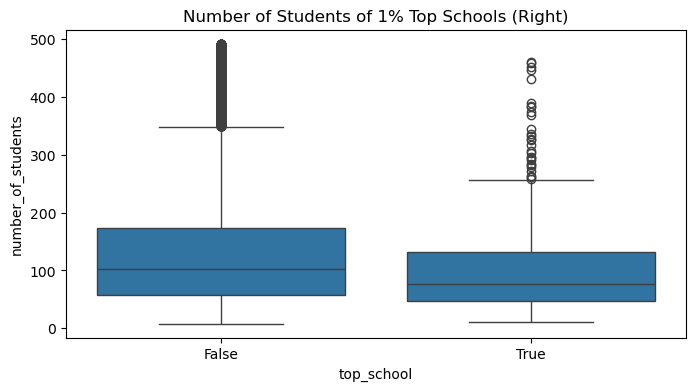

In [7]:
plot_data = (df
             .assign(top_school = df["avg_score"] >= np.quantile(df["avg_score"], .99))
             [["top_school", "number_of_students"]]
             .query(f"number_of_students<{np.quantile(df['number_of_students'], .98)}"))

plt.figure(figsize=(8,4))
ax = sns.boxplot(x="top_school", y="number_of_students", data=plot_data)

plt.title("Number of Students of 1% Top Schools (Right)")

이들 학교를 살펴보면 평균적으로 학생 수가 더 적다. 여기서 규모가 작은 학교일수록 학업 성취도가 높다는 결론이 나온다. 교사 한 명에게 배정되는 학생 수가 적을수록 각 학생을 집중해서 관리할 수 있으니, 직관적으로도 납득이 가능한 결론이다. 하지만 이 정보를 바탕으로 중요한 의사결정을 내린다면 큰 대가를 치러야 할 수 있다. Howard Wainer의 저널에 이에 관한 설명이 나온다.

<p style="text-align: center;">
<i><b>1990년대에는 학교 규모 줄이기가 유행처럼 번졋다. 시험 성적이 높은 그룹에는 소규모 학교의 학생들이 많았으므로 수많은 자선 단체와 정부 기관이 규모가 큰 학교를 분할하는 데 자금을 사용했다.
</b></i>
</p>


그런데 사람들은 하위 1%의 학교들도 학생 수가 적음에도 불구하고 해당 학교들의 데이터는 확인하지 않는다.

Text(0.5, 1.0, 'ENEM Score by Number of Students in the School')

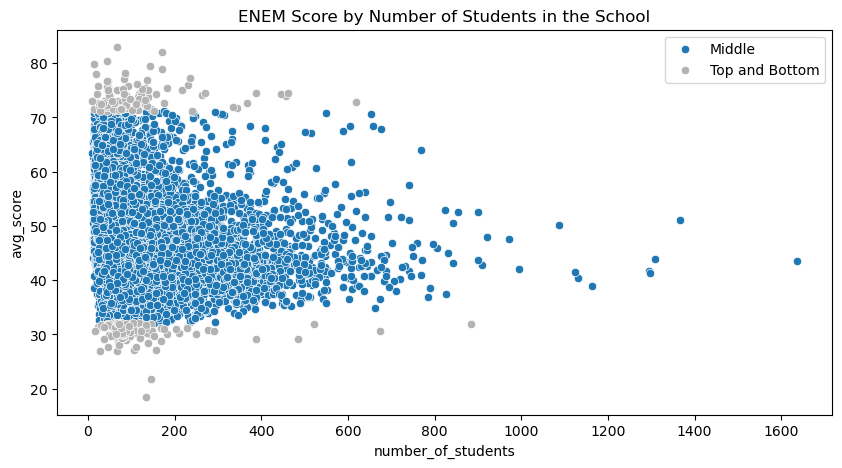

In [8]:
q_99 = np.quantile(df["avg_score"], .99)
q_01 = np.quantile(df["avg_score"], .01)

plot_data = (df
             .sample(10000)
             .assign(Group = lambda d: np.select([(d["avg_score"] > q_99) | (d["avg_score"] < q_01)],
                                                 ["Top and Bottom"], "Middle")))
plt.figure(figsize=(10,5))
sns.scatterplot(y="avg_score", x="number_of_students", data=plot_data.query("Group=='Middle'"), label="Middle")
ax = sns.scatterplot(y="avg_score", x="number_of_students", data=plot_data.query("Group!='Middle'"), color="0.7", label="Top and Bottom")

plt.title("ENEM Score by Number of Students in the School")

해당 plot에는 $SE$가 예측한 결과가 있다. 학생 수가 증가함에 따라 평균 점수는 점점 명확해진다. 학생 수가 매우 적은 학교(표본 크기가 작음)에서는 단순히 우연 때문에 점수가 매우 높거나 낮을 수 있다. 반면에 규모가 큰 학교에서는 우연이 작용할 가능성이 적다. $SE$는 이렇게 데이터 형태 기록의 근본적인 사실, 즉 부정확하다는 점을 지적한다. 여기서 문제는 **얼마나 부정확한가?** 이다.  
불확실성을 정량화하는 방법 중 하나는 **추정값의 분산**을 계산하는 것이다. 분산은 관측값이 중심값에서 얼마나 벗어나는지 알려준다. $SE$ 공식에서 보았듯이, 이 불확실성은 관측한 데이터의 수가 증가함에 따라 줄어든다. 위의 plot에서 볼 수 있듯이, 표본의 크기(학생 수)가 작을 때는 학교의 성과에 대한 추정값의 편차가 크다. 반대로, 표본의 크기가 커짐에 따라 분산이 줄어든다. 이는 학교의 평균 점수뿐만 아니라, 추정하려는 $ATE$를 포함한 모든 요약통계량에도 적용이 된다.

<div style="border: 2px solid rgb(233, 224, 222); padding: 10px; background-color: rgb(233, 224, 222); margin: 10px 0;">
    <strong style="font-weight: bold;">● 체계적 오차와 무작위 오차</strong><br>
    데이터의 불확실성에 대해서 <b>체계적 오차(systematic error)</b>와 <b>무작위 오차(random error)</b>를 애기할 수 있다. 체계적 오차는 모든 측정값에 동일한 방식으로 영향을 미치는 일관된 편향이며, 무작위 오차는 우연히 생긴 예측 불가능한 변동이다. 체계적 오차 또는 편향은 모든 측정값을 추정하려는 값에서 벗어나려는 방향으로 밀어넣으므로 데이터를 더 많이 수집한다고 해서 줄어들지 않는다. 반대로 무작위 오차는 표본 크기가 증가함에 따라 줄어든다.
</div>

---

## 2.5 추정값의 표준오차

2.4에서 실험군과 대조군의 평균 차이인 $E[Y|T=1]-E[Y|T=0]$로 $E[Y_1-Y_0]$를 추정했다. 즉, 두 종류의 교차 판매 이메일이 전환에 미치는 평균 처치효과를 알아냈다. 그 결과 짧은 이메일은 8%p 이상의 효과를 보였고, 긴 이메일은 1.3%p 증가에 그쳤다. 이러한 효과가 우연에 따른 것이 아니라고 확신할 만큼 표본 크기가 충분한지, 통계적으로 유의(***Statistically significant***)한지 확인하려면 표준오차 $SE$를 추정해야 한다.

각 실험군에 대해 파이썬 함수인 `len`로 구하거나 판다스의 groupby 함수를 사용한 다음 `size()` 집계 함수를 덧붙이면 된다.

In [9]:
url= "https://raw.githubusercontent.com/matheusfacure/causal-inference-in-python-code/main/causal-inference-in-python/data/cross_sell_email.csv"

data=pd.read_csv(url)

In [10]:
short_email = data.query("cross_sell_email=='short'")['conversion']
long_email = data.query("cross_sell_email=='long'")['conversion']

email = data.query("cross_sell_email!='no_email'")['conversion']
no_email = data.query("cross_sell_email=='no_email'")['conversion']

In [11]:
data.groupby('cross_sell_email').size()

cross_sell_email
long        109
no_email     94
short       120
dtype: int64

표본 표준편차는 다음과 같은 수식으로 계산한다.
$$
\hat \sigma=\sqrt{\frac{1}{N}\sum_{i=1}^{N}(x-\bar{x})^2}
$$

판다스에서는 std 메서드를 사용하면 된다. 이외에도 판다스에는 표준오차를 계산해주는 메서드인 `.sem()`이 내장되어 있다.

In [12]:
def se(y: pd.Series):
    return y.std() / np.sqrt(len(y))

print("SE for Long Email:%.3f"%se(long_email))
print("SE for Short Email:%.3f"%se(short_email))

SE for Long Email:0.022
SE for Short Email:0.030


In [13]:
print(long_email.sem())
print(short_email.sem())

0.02194602460918551
0.030316953129541618


---

## 2.6 신뢰구간

추정값의 표준오차 $SE$는 신뢰도를 나타내는 척도이다. 통계학의 빈도주의 관점에서 데이터는 근본적인 데이터 생성 과정의 표현에 불과하다고 본다. 이 생성 과정은 추상적이고 이상적이다. 또한, 변하지 않는 매개변수에 따라 정해지는데, 그 참값은 알려지지 않았다. 교차 판매 이메일 예시에서 여러 번 실험하고 각각의 전환율을 계산해보면 정확히 같지는 않더라도 실제 전환율에 근접할 수 있다.

교차 판매 이메일에서의 실제 분포를 안다고 가정해본다. 전환은 0 또는 1이므로 베르누이 분포를 따르며, 성공 확률 $p=0.08$이라고 한다. 즉 고객이 짧은 이메일을 받을 때마다 전환될 확률은 8%이다. 그 다음 실험을 10000번 실행해본다. 실험마다 100명의 고객 표본을 수집해서 짧은 이메일을 보내고 평균 전환율을 관측해서 총 10000개의 전환율을 얻는다. 이 실험에서 얻은 10000개의 전환율을 실제 평균인 0.08을 중심으로 분포할 것이다.

In [14]:
n = 100
p = 0.08

def experiment():
    return np.random.binomial(1,p=p,size=n)

np.random.seed(42)

experiments = [experiment().mean() for _ in range(10000)]

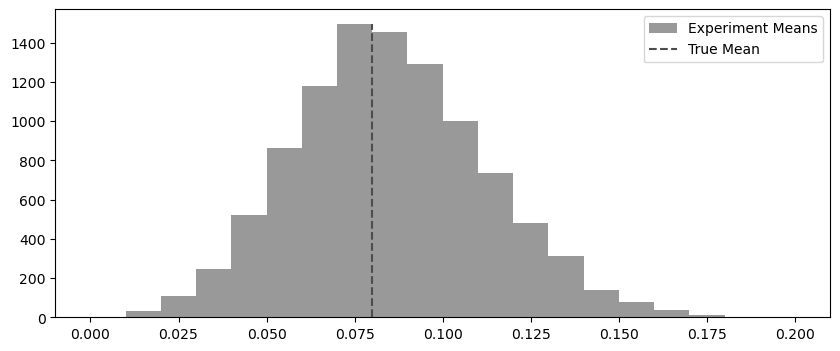

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
freq, bins, img = plt.hist(experiments, bins=20, label="Experiment Means", color="0.6")
plt.vlines(p, ymin=0, ymax=freq.max(), linestyles="dashed", label="True Mean", color="0.3")
plt.legend()
plt.show()

실험의 평균값은 실제 이론적인 평균과 항상 일치하지는 않는다. 하지만 **표준오차를 사용해 진행하는 실험의 95%에서 실제 평균을 포함하는 구간을 만들 수 있다.**

현실에서는 여러 데이터셋에서 동일한 실험을 시뮬레이션할 여유가 없고, 단 하나의 데이터셋만 있는 경우가 많다. 하지만 여러 실험을 시뮬레이션하는 아이디어를 바탕으로 **신뢰구간(Confidence Interval)** 을 구성할 수 있다. 신뢰구간에는 확률이 따라붙는데, 흔히 95%를 사용한다. 이 확률을 여러 실험을 수행하고 각 실험에서 95% 신뢰구간을 구성한다면 **실제 평균이 100번 중 95번은 신뢰구간 내에 속함**을 의미한다.

신뢰구간 계산에 사용할 **중심극한정리(Central Limit Theorem,CLT)** 를 살펴본다. 중심극한정리는 데이터의 분포가 정규분포가 아니더라도, **데이터의 평균은 항상 정규분포를 따름**을 의미한다. 전환 예시에서 전환에 대한 데이터를 여러 번 수집하고 매번 평균 전환율을 계산하면 이 평균들은 정규분포를 따르게 된다. 이를 통해 신뢰구간을 계산할 때 정규분포의 질량(density)의 95%가 평균 양 옆으로 표준편차 1.96배 내에 있다는 통계적인 지식을 활용할 수 있다.

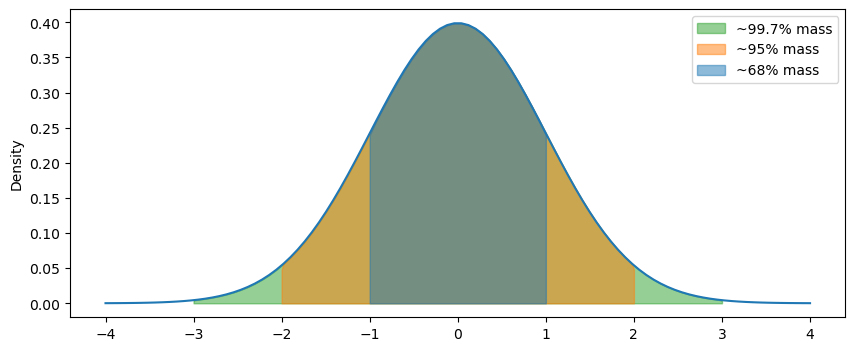

In [16]:
import scipy.stats as stats
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, 0, 1)

plt.figure(figsize=(10,4))
plt.plot(x, y, linestyle="solid")
plt.fill_between(x.clip(-3, +3), 0, y, alpha=0.5, label="~99.7% mass", color="C2")
plt.fill_between(x.clip(-2, +2), 0, y, alpha=0.5, label="~95% mass", color="C1")
plt.fill_between(x.clip(-1, +1), 0, y, alpha=0.5, label="~68% mass", color="C0")
plt.ylabel("Density")
plt.legend()
plt.show()

교차 판매 실험에서 유사한 실험을 여러 번 수행하면 전환율은 정규분포를 따르게 된다. 우리가 모르는 전환율 분포의 평균에 대한 최선의 추정값은 실험에서 얻은 평균이다. 그리고 이 표본평균 분포의 표준편차가 표준오차이다. 따라서 표준오차에 2를 곱하고 실험 평균에서 더하고 빼면 실제 평균에 대한 95% 신뢰구간을 구성할 수 있다.

In [17]:
exp_se = short_email.sem()
exp_mu = short_email.mean()

ci = (exp_mu - 1.96*exp_se,exp_mu + 1.96*exp_se)
print('95% CI for Short_Email:',ci)

95% CI for Short_Email: (0.06557877186609842, 0.18442122813390158)


물론 95% 신뢰구간에서 멈출 필요는 없다. 99% 구간도 생성할 수 있다. 표준편차에 정규분포 질량 중 99%를 포함하는 계수를 곱하기만 하면 된다. 해당 계수를 찾으려면 `scipy`의 `ppf` 함수를 사용하면 된다. 이 함수는 표준정규분포의 누적분포함수(CDF)의 역함수를 반환한다. 따라서 유의수준(significant level) $\alpha$에 대해 1-$\alpha$의 신뢰구간을 얻으려먼 표준오차에 |$ppf(\alpha/2)$|를 곱하면 된다.

In [18]:
z = np.abs(stats.norm.ppf((1-0.99)/2))

ci = (exp_mu - z*exp_se,exp_mu + z*exp_se)
print(z)
print(ci)

2.5758293035489004
(0.04690870373460816, 0.20309129626539185)


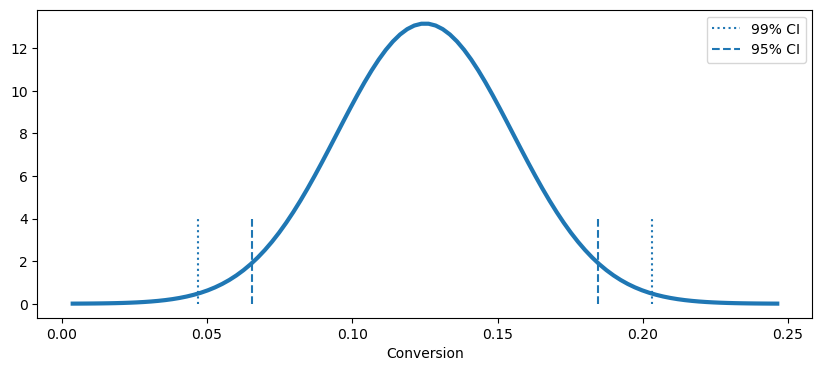

In [19]:
x = np.linspace(exp_mu - 4*exp_se, exp_mu + 4*exp_se, 100)
y = stats.norm.pdf(x, exp_mu, exp_se)

plt.figure(figsize=(10,4))
plt.plot(x, y, lw=3)
plt.vlines(ci[1], ymin=0, ymax=4, ls="dotted")
plt.vlines(ci[0], ymin=0, ymax=4, ls="dotted", label="99% CI")


ci_95 = (exp_mu - 1.96 * exp_se, exp_mu + 1.96 * exp_se)

plt.vlines(ci_95[1], ymin=0, ymax=4, ls="dashed")
plt.vlines(ci_95[0], ymin=0, ymax=4, ls="dashed", label="95% CI")
plt.xlabel("Conversion")
plt.legend()
plt.show()

이는 짧은 이메일에 관한 그래프이며, 다른 실험군의 전환율에 대한 95% 신뢰구간을 표시할 수도 있다.

In [20]:
def ci(y: pd.Series):
    return (y.mean()-2*y.sem(), y.mean()+2*y.sem())

print('95% CI for Short Email:',ci(short_email))
print('95% CI for Long Email:',ci(long_email))
print('95% CI for No Email:',ci(no_email))

95% CI for Short Email: (0.06436609374091676, 0.18563390625908324)
95% CI for Long Email: (0.011153822341262012, 0.09893792077800405)
95% CI for No Email: (0.0006919679286838329, 0.08441441505003958)


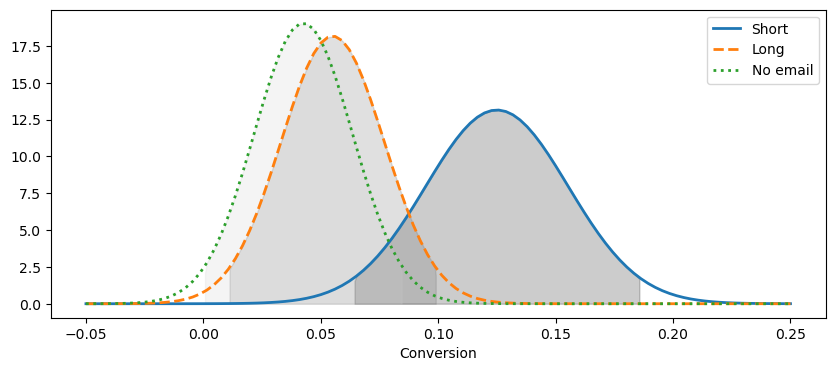

In [21]:
plt.figure(figsize=(10,4))

x = np.linspace(-0.05, .25, 100)
short_dist = stats.norm.pdf(x, short_email.mean(), short_email.sem())
plt.plot(x, short_dist, lw=2, label="Short", linestyle=linestyle[0])
plt.fill_between(x.clip(ci(short_email)[0], ci(short_email)[1]), 0, short_dist, alpha=0.2, color="0.0")

long_dist = stats.norm.pdf(x, long_email.mean(), long_email.sem())
plt.plot(x, long_dist, lw=2, label="Long", linestyle=linestyle[1])
plt.fill_between(x.clip(ci(long_email)[0], ci(long_email)[1]), 0, long_dist, alpha=0.2, color="0.4")

no_email_dist = stats.norm.pdf(x, no_email.mean(), no_email.sem())
plt.plot(x, no_email_dist, lw=2, label="No email", linestyle=linestyle[2])
plt.fill_between(x.clip(ci(no_email)[0], ci(no_email)[1]), 0, no_email_dist, alpha=0.2, color="0.8")

plt.xlabel("Conversion")
plt.legend()
plt.show()

여기서 세 그룹의 95% 신뢰구간이 서로 겹치는 것을 볼 수 있다. 만약 이 구간들이 겹치지 않았다면 그룹 간의 전환율 차이가 단지 우연이 아닐 가능성이 높다고 볼 수 있다. 하지만 실제로는 구간이 겹치므로 아직은 그룹 간의 전환율 차이가 통계적으로 유의하다고 단정지을 순 없다.

신뢰구간은 추정값에 대해 불확실성을 나타내는 방법이다. 표본 크기가 작을수록 표준오차가 커지고, 그 결과 신뢰구간도 넓어진다. 신뢰구간은 계산하기 매우 쉬우므로 신뢰구간이 제시되지 않는 결과물에 대해선 불순한 의도나 지식 부족을 의심해야 한다. 마지막으로 한 가지 주의할 점은 신뢰구간의 해석은 생각보다 까다롭다. **어떤 95% 신뢰구간이 95%의 확률로 실제 평균을 포함한다고 말해서는 절대 안된다.**

<div style="border: 2px solid rgb(233, 224, 222); padding: 10px; background-color: rgb(233, 224, 222); margin: 10px 0;">
    <strong style="font-weight: bold;">● 신용구간</strong><br>
    추정값이 구간 안에 있을 확류레 대해 구체적으로 언급하고 싶다면, 베이지안 통계의 신뢰구간에 해당하는 <b>신용구간(Credible interval)</b>를 살펴보면 된다.
</div>

---

## 2.7 가설검정

불확실성을 반영하는 또 다른 방법은 **가설검정(hypothesis testing)** 을 통해 결과는 제시하는 것이다. 가설검정은 **'두 그룹 간의 평균 차이가 0 또는 특정값과 통계적으로 유의한 차이가 있는가?'** 에 대해 다룬다. 이를 알기 위해선, 먼저 두 개의 독립적인 정규분포의 합이나 차이 역시 정규분포를 따른다는 점을 알아야 한다. 그 결과로 생성된 분포의 평균은 원래 두 분포의 평균의 합이나 차이가 되고 분산은 항상 두 분산의 합으로 계산된다.
$$
N(\mu_1,\sigma^2_1)-N(\mu_2,\sigma^2_2)=N(\mu_1-\mu_2,\sigma^2_1+\sigma^2_2)
$$
$$
N(\mu_1,\sigma^2_1)+N(\mu_2,\sigma^2_2)=N(\mu_1+\mu_2,\sigma^2_1+\sigma^2_2)
$$

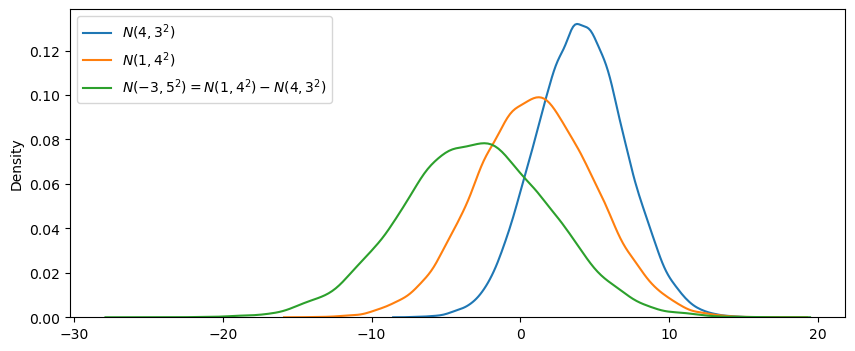

In [29]:
np.random.seed(123)

n1=np.random.normal(4,3,30000)
n2=np.random.normal(1,4,30000)
n_diff=n2-n1

plt.figure(figsize=(10,4))
sns.kdeplot(n1,label='$N(4,3^2)$')
sns.kdeplot(n2,label='$N(1,4^2)$')
sns.kdeplot(n_diff,label=f'$N(-3,5^2)=N(1,4^2)-N(4,3^2)$')

plt.legend()
plt.show()

시뮬레이션에서 각자 고유한 분포를 가진 두 그룹을 서로 빼서 세 번째 분포를 만들었다. 이 최종 분포의 평균은 원래 두 분포 평균의 차이가 되며, 표준편차는 두 분산의 합의 제곱근으로 계산된다. 실험 결과의 평균 분포에 관해 다루고 있으므로 이 평균의 표준편차를 평균의 표준오차로 생각할 수 있다.
$$
\mu_{diff}=\mu_1-mu_2
$$
$$
SE_{diff}=\sqrt{SE_1^2+SE_2^2}
$$
이 개념을 이용해 교차 판매 이메일 실험에서의 전환율을 비교 문제에 적용할 수 있다. 두 그룹 (짧은 이메일 그룹과 이메일을 받지 않은 그룹)의 예상 분포를 통해 한 그룹에서 다른 그룹을 빼면 그 차이의 분포를 얻을 수 있다. 이 분포를 통해 평균 차이에 대한 95% 신뢰구간을 쉽게 구할 수 있다.

In [23]:
diff_mu = short_email.mean() - no_email.mean()
diff_se = np.sqrt(no_email.sem()**2+short_email.sem()**2)

ci = (diff_mu - 1.96*diff_se, diff_mu + 1.96*diff_se)
print(f'95% CI for the difference (short email - no email):\n{ci}')

95% CI for the difference (short email - no email):
(0.010239808474398426, 0.15465380854687816)


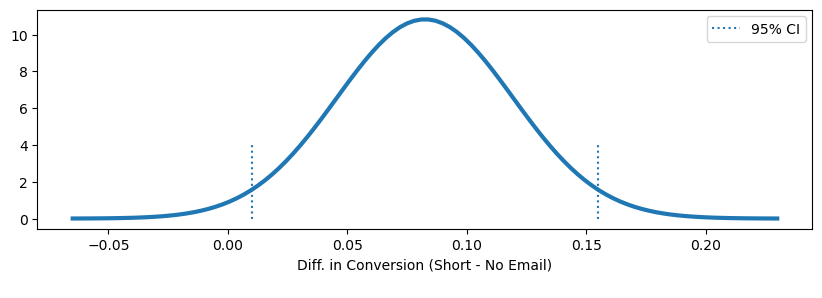

In [24]:
x = np.linspace(diff_mu - 4*diff_se, diff_mu + 4*diff_se, 100)
y = stats.norm.pdf(x, diff_mu, diff_se)

plt.figure(figsize=(10,3))
plt.plot(x, y, lw=3)
plt.vlines(ci[1], ymin=0, ymax=4, ls="dotted")
plt.vlines(ci[0], ymin=0, ymax=4, ls="dotted", label="95% CI")
plt.xlabel("Diff. in Conversion (Short - No Email)\n")
plt.legend()
plt.subplots_adjust(bottom=0.15)
plt.show()

### 귀무가설
신뢰구간을 활용하면 **귀무가설(Null hypothesis)** 에 관한 질문에 답할 수 있다. 예를 들어, 짧은 이메일을 받는 그룹과 이메일을 받지 않은 그룹의 전환율에 차이가 없다는 가설을 세울 수 있다. 귀무가설은 $H_0$로 표기한다.
$$
H_0 : Conversion_{no\_email} = Conversion_{short\_email}
$$
해당 가설을 세운 후 데이터를 살펴보고 그것이 귀무가설과 일치하는지 여부를 파악한다. 만약 일치하지 않는다면, 귀무가설이 참인 경우 이런 데이터가 나타나는 것은 너무 극단적이므로 귀무가설을 기각하는 것이 타당하다고 할 수 있다. 이 과정을 진행하는 방법 중 하나가 신뢰구간을 활용하는 것이다.

앞서 언급한 95% 신뢰구간에는 0이 포함되어 있지 않음을 주목해야 한다. 또한 이 구간이 전환율 차이에 대한 신뢰구간임을 알아야 한다. 귀무가설에 따르면 이 차이는 0이어야 하지만, 신뢰구간이 0을 완전히 벗어난 것을 볼 수 있다. 귀무가설이 참이라면 이러한 결과를 관측할 확률은 매우 낮다. 따라서 유의수준 $\alpha=0.05$ (95% 신뢰도) 하에서 귀무가설을 기각할 수 있다. '전혀 차이가 없다'는 가설 외에도 다른 귀무가설을 세울 수 있다.

### 검정통계량
신뢰구간 외에도, **검정통계량(test Statistic)** 을 사용하여 귀무가설을 기각하는 것이 유용할 수 있다. 이러한 통계량은 대체로 값이 클수록 귀무가설을 기각하는 방향으로 설정된다. 가장 널리 사용되는 검정통계량 중 하나는 t-통계량이다. 이 통계량은 신뢰구간을 형성하는 분포를 정규화함으로써 정의된다.
$$
t_{\Delta} = \frac{\mu_{\Delta}-H_0}{SE_{\Delta}}=\frac{(\mu_1-\mu_2)-H_0}{\sqrt{\sigma_1^2/n_1+\sigma_2^2/n_2}}
$$

여기서 $H_0$는 귀무가설에서 정의한 값이다.

해당 식에서 분자는 관측한 평균 차이와 귀무가설 사이에 대한 차이이다. 만약 귀무가설이 참이라면 이 분자의 기댓값은 0이 된다. 분모는 단순히 표준오차로 통계량의 분산이 1이 되도록 표준화한다. 이 표준화를 통해 귀무가설이 참인 경우, $t_{\Delta}$는 표준정규분포 $N(0,1)$을 따르게 된다. 귀무가설 하에서 $t_{\Delta}$는 0이 중심이기 때문에 1.96보다 높거나 -1.96보다 낮은 값은 매우 드물게 나타난다. 이러한 극단적인 t-통계량이 나타나면 귀무가설을 기각할 수 있다. 지금 다루는 예제에서 효과가 없는 경우 $H_0$의 통계량은 2보다 크므로 유의수준 $\alpha=0.05$ 하에서 기각할 수 있다.

In [25]:
t_test = (diff_mu-0) / diff_se
print(t_test)

2.237951231871536


또한 t-통계량은 귀무가설 하에서 정규분포를 따르므로 이를 이용하여 p값(p-value) 쉽게 계산할 수 있다.

---

## 2.8 P-value

앞의 예시에서 이메일을 받은 고객과 짧은 이메일을 받은 고객의 전환율이 동일한데도 극단적인 차이가 나타날 확률을 5% 미만이라고 했다. 이런 극단적인 값을 관측할 확률은 p-value를 통해 애기할 수 있다.  
신뢰구간과 마찬가지로, p-value의 정의는 **'귀무가설이 참이라고 가정할 때 관측된 결과보다 더 극단적인 결과가 실제로 관측될 확률'** 이다. 즉, p-value는 귀무가설이 참일 경우 극단적인 데이터가 나타날 확률을 의미한다. 이 값은 귀무가설이 참일 때 관측한 측정값이 얼마나 이례적인지를 측정한다. 이로 인해 '귀무가설이 참일 확률'과 헷갈릴 수도 있다. 여기서 p-value는 $P(H_0|data)$가 아니라 $P(data|H_0)$이다. 이 두가지 차이를 확실히 구분해야 한다.

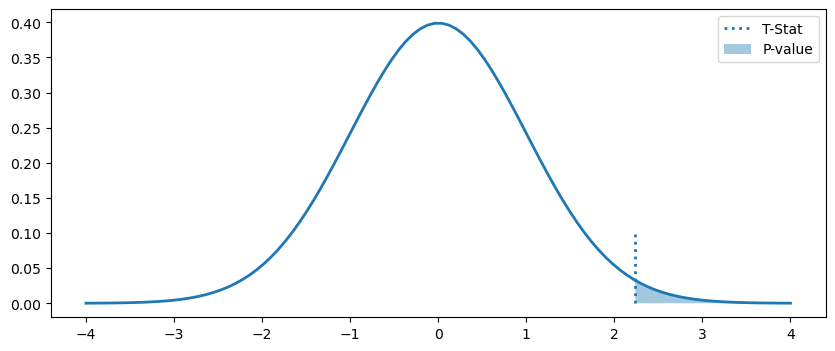

In [30]:
t_stat = (diff_mu-0)/ diff_se

x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, 0, 1)

plt.figure(figsize=(10,4))
plt.plot(x, y, lw=2)
plt.vlines(t_stat, ymin=0, ymax=0.1, ls="dotted", label="T-Stat", lw=2)
plt.fill_between(x.clip(t_stat), 0, y, alpha=0.4, label="P-value")
plt.legend()
plt.show()

단측 귀무가설('차이가 $x$보다 크다' or '차이가 $x$보다 작다')에서 p-value를 구하려면 표준정규분포에서 검정통계량 전에 해당하는 영역의 넓이를 계산하면 된다. 양측 귀무가설('차이가 $x$이다')는 해당 결과에 2를 곱하면 된다.

In [27]:
print('p-value:',(1-stats.norm.cdf(t_stat))*2)

p-value: 0.025224235562152142


p-value는 95%나, 99% 같은 신뢰수준을 정할 필요가 없다. 하지만 신뢰수준을 보고 싶다면, p-value를 통해 검정이 어느 신뢰수준에서 통과 또는 실패할지 정확하게 알 수 있다. 예를 들어, p-value값이 0.025인 경우 유의수준은 2.5%이다. 따라서 차이에 대한 95% 신뢰구간은 0이 포함되지 않겠지만, 99% 신뢰구간에는 0이 포함된다. 또한, 이 p-value는 차이가 실제로 0이라면 이렇게 극단적인 검정통계량이 관측될 확률이 단 2.5%임을 나타낸다.

---

## 2.9 검정력

지금까지는 이미 시행된 테스트의 데이터를 제공받은 데이터 분석가의 관점에서 통계 개념을 살펴봤다. 주어진 데이터를 그대로 다루고 이미 설계된 실험을 해석하는 대신, 실험을 새로 설계해야 하는 요청을 받으면, 각 변수에 어떤 표본을 사용할지 결정해야 한다. 예를 들어, 교차 판매 이메일 실험을 실행하지 않은 상태에서 몇 명의 고객에게 긴 이메일을 보낼지, 몇 명에게 짧은 이메일을 보낼지, 몇 명에게 아예 이메일을 보내지 않을지 결정해야 한다. 이때 효과가 없다는 귀무가설이 거짓일 경우 이를 정확하게 기각할 만큼 층분히 큰 표본을 확보하는 것이 목표이다. 즉, **귀무가설을 올바르게 기각할 확률을 검정력**이라고 한다. 검정력은 실험에 필요한 표본 크기를 파악할 때뿐만 아니라, 제대로 실행하지 않은 실험에서 문제를 발견할 때도 유용하다.

검정력은 통계적 유의성과 밀접한 관련이 있다. $\alpha$가 실제로 참인 귀무가설을 잘못 기각할 확률을 나타내는 반면, 검정력 $(1-\beta)$은 귀무가설이 거짓인 경우 이를 올바르게 기각할 확률이다. 다른 관점에서 보면, 검정력도 $\alpha$에 관한 식으로 정의되는데, 이는 귀무가설을 올바르게 기각하기 위해 필요한 증거의 충분성을 결정하기 위함이다.

95% 신뢰구간이란, 우리가 실험을 통해 얻은 신뢰구간 중 95%가 추정하고자 하는 매개변수의 실젯값을 포함함을 의미한다. 또한 이는 나머지 5%에서 실젯값을 포함하지 않음을 의미한다. 이로 인해 5%의 확률로 귀무가설을 잘못 기각하게 된다. $\alpha=0.05$인 경우, 통계적으로 유의하다고 결론을 내리려면 매개변수 추정값과 귀무가설 사이의 차이인 $\delta$가 최소한 0에서 $1.96 \times SE$만큼 떨어져 있어야 한다. 이는 $\delta-1.96 \times SE$가 95% 신뢰구간의 하한이기 때문이다.

따라서 결과가 통계적으로 유의하다고 하기 위해서는 $\delta- 1.96 \times SE \gt 0$이어야 한다. 검정력은 귀무가설을 올바르게 기각할 확률, 즉 $1-\beta$이다. 여기서 $\beta$는 귀무가설이 실제오 거짓일 때 이를 기각하지 않을 확률이다.

---

## 2.10 표본 크기 계산

귀무가설이 거짓일 때 귀무가설과 관측된 추정값의 차이인 $\delta$를 감지할 수 있어야 한다. $\alpha=5\%$, $1-\beta=80\%$라면 감지 가능한 효과는 $2.8 \times SE = 1.96\%$이다. 따라서, 이메일 변환 예시에서 본 것처럼 $8\%$ 차이를 감지하고자 하는 교차 판매 이메일 실험을 설계하고자 한다면, 적어도 $2.8SE=8\%$를 감자할 표본 크기를 확보해야 한다. 차이에 대한 표준오차 공식을 전개하면 $SE_{\Delta}=\sqrt{SE^2_1+SE^2_2}$가 된다. 하지만 지금 우리는 실험 결과를 보는 분석가의 관점이 아니라 실험을 설계하는 입장이다. 우리에게 실험군의 표준오차는 주어지지 않았지만, 실험군과 대조군의 분산이 같을 것이라고 가정할 수 있다. 따라서 $SE_{\Delta}=\sqrt{2SE^2}=\sqrt{2\sigma^2/n}=\sigma\sqrt{2/n}$이다. 이를 감지 가능한 차이에 연계하면 80%의 검정력과 95%의 신뢰도를 원할 때 표본 크기를 결정하는 매우 간단한 공식을 얻을 수 있다.  
$$
\delta=2.8\sigma\sqrt{2/n}
$$
$$
n=2 \times2.8 \times \sigma^2 / \delta^2 \approx 16\sigma^2 / \delta^2
$$

여기서 $\delta$는 감지 가능한 차이이며, 보수적으로 계산하려고 $2 \times 2.8^2$은 반올림했다. 해당 공식을 데이터에 적용하면 대조군의 분산을 $\sigma^2$에 대한 가장 타당한 추정값으로 사용해서 필요한 표본 크기를 다음과 같이 정의할 수 있다.

In [28]:
print(np.ceil(16*(no_email.std()/0.08)**2))

data.groupby('cross_sell_email').size()

103.0


cross_sell_email
long        109
no_email     94
short       120
dtype: int64

---

## 2장 요약

2장에서는 인과관계 식별과 추정을 연결하고 중요한 통계적 개념을 복습했다. 인과추론의 목표는 데이터에서 인과 추정량을 구하는 것이다. 이 과정의 첫 번째 단계는 식별이다. 식별 단계에서는 몇 가지 가정을 사용하여 관측할 수 없는 인과 추정량을 데이터에서 추정할 수 있는 관측 가능한 통계량으로 바꿀 수 있다.

예를 들어, $ATE$는 관측할 수 없는 잠재적 결과인 $ATE=E[Y_1-Y_0]$로 정의되는 인과 추정량이다. $ATE$는 독립성 가정 $T \bot (Y_0,Y_1)$을 사용해 식별할 수 있다. 이 경우 관측 가능한 $E[Y|\ T=1]$과 $E[Y|\ T=0]$을 이용해 $ATE$를 계산할 수 있다. 즉, 독립성 가정이 충족된다면 다음 식이 성립한다.
$$
E[Y_1-Y_0]=E[Y|\ T=1]-E[Y|\ T=0]
$$


또한 무작위 통제 실험을 활용하여 이 가정을 더 타당하게 만드는 방법도 살펴봤다. 처치를 무작위로 배정하면 처치와 잠재적 결과 $Y_t$가 독립이게 만들 수 있다.

그러나 식별은 인과추론의 첫 단계에 불과한다. 통계량을 이용해 인과 추정량을 계산할 수 있게 되면, 이제는 통계량을 추정할 단계이다. 예를 들어, $ATE$를 $E[Y|\ T=1]$과 $E[Y|\ T=0]$으로 쓸 수 있다면 이제는 그 값을 추정해야 한다.

이러한 추정 단계에 사용하는 통계 개념을 배웠다. 표준오차를 다음과 같이 구한다.
$$
SE=\sigma / \sqrt{n}
$$
그리고 이 식을 이용해 추정값 $\mu$를 중심으로 신뢰구간을 구성하는 방법은 다음과 같다.
$$
\hat{\mu}\pm z \times SE
$$
여기서 $z$는 정규분포의 질량 중에 $\alpha \%$에 해당하는 값이다.

또한 두 그룹 간의 평균 차이에 대한 신뢰구간을 구하는 방법도 배웠다. 이 과정은 두 그룹의 분산을 더하고 그 차이에 대한 표준오차를 찾는 것으로 요약된다.
$$
SE_{\Delta}=\sqrt{SE_1^2+SE_2^2}
$$
마지막으로 검정력과 이를 이용해 실험에 필요한 표본 크기를 계산하는 법을 배웠다. 특히 95% 신뢰도와 80% 검정력이라면 표본 크기 공식을 다음과 같이 단순화할 수 있다.
$$
N=16 \times \sigma^2 / \delta^2
$$

여기서 $\delta$는 감지 가능한 차이이다.